# Introduction

The dataset I chose to analyze for this is the Arrest Data in Pittsburgh.

I chose this dataset because I feel like crime data is a super huge aspect in determining the quality of a neighborhood.

The metric I used to determine this is dividing the number of crimes in the neighborhood by the size of the neighborhood in square miles.

The 'best' neighborhood based on the metric is: Central Northside

Top 5 Best Neighborhoods:
['Central Northside', 'New Homestead', 'Summer Hill', 'Regent Square', 'St. Clair']

Top 5 Worst Neighborhoods:
['Squirrel Hill South', 'Crawford-Roberts', '0', '0', '0']


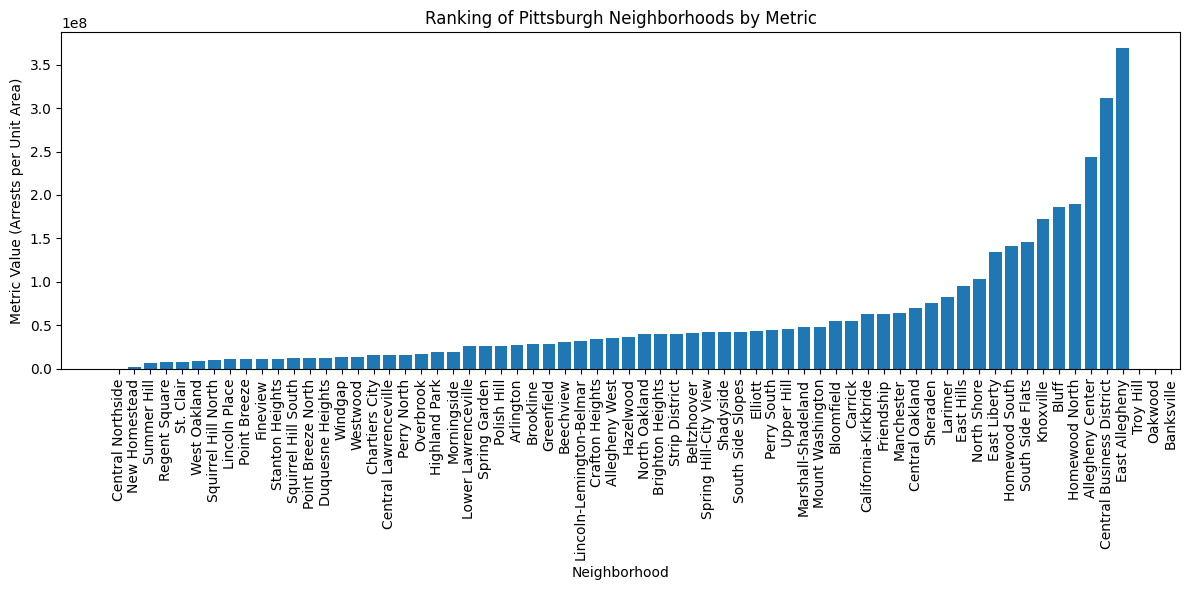

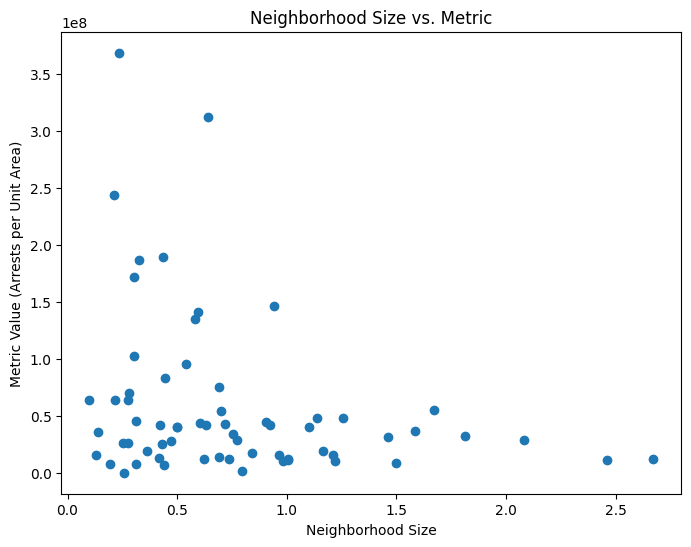

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the arrest data
arrests = pd.read_csv('pittArrestData.csv')

# Clean and preprocess the data
arrests = arrests.dropna(subset=['INCIDENTNEIGHBORHOOD'])  # Drop rows with missing neighborhood

# Load the neighborhood sizes data
neighborhood_sizes = pd.read_csv('miles.csv')

# Replace 0 values in the 'size' column with 1 to avoid division by zero
neighborhood_sizes['size'] = neighborhood_sizes['size'].replace(0, 1)

# Group the arrest data by neighborhood and count the total arrests
arrest_counts = arrests.groupby('INCIDENTNEIGHBORHOOD')['_id'].sum().reset_index()

# Merge the arrest counts with the neighborhood sizes
neighborhoods = neighborhood_sizes.merge(arrest_counts, left_on='neighborhood', right_on='INCIDENTNEIGHBORHOOD', how='left')
neighborhoods = neighborhoods.fillna(0)  # Fill NaN with 0 for neighborhoods with no arrests

# Calculate the metric
neighborhoods['metric'] = neighborhoods['_id'] / neighborhoods['size']

#Nneighborhood with the lowest metric value (the "best" neighborhood)
best_neighborhood = neighborhoods.loc[neighborhoods['metric'].idxmin()]
print(f"The 'best' neighborhood based on the metric is: {best_neighborhood['neighborhood']}")

# Find the top 5 best and worst neighborhoods
neighborhoods.sort_values('metric', ascending=True, inplace=True)
neighborhoods['neighborhood'] = neighborhoods['neighborhood'].astype(str)  # Convert neighborhood column to string type

# Top 5 best neighborhoods
top_5_best = neighborhoods.head(5)['neighborhood'].tolist()
print("\nTop 5 Best Neighborhoods:")
print(top_5_best)

# Top 5 worst neighborhoods
top_5_worst = neighborhoods.tail(5)['neighborhood'].tolist()
print("\nTop 5 Worst Neighborhoods:")
print(top_5_worst)

# Visualize the metric values for all neighborhoods
# Plot a bar chart of the metric values
plt.figure(figsize=(12, 6))
plt.bar(neighborhoods['neighborhood'], neighborhoods['metric'])
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Metric Value (Arrests per Unit Area)')
plt.title('Ranking of Pittsburgh Neighborhoods by Metric')
plt.tight_layout()
plt.show()

#scatter plot of neighborhood size vs. metric
plt.figure(figsize=(8, 6))
plt.scatter(neighborhoods['size'], neighborhoods['metric'])
plt.xlabel('Neighborhood Size')
plt.ylabel('Metric Value (Arrests per Unit Area)')
plt.title('Neighborhood Size vs. Metric')
plt.show()

# Conclusion

Conclusion:
The data-driven approach to determining the "best" neighborhood in Pittsburgh based on the metric of arrests per unit area has yielded interesting results. The analysis identified Central Northside as the top-ranked neighborhood, while areas like Squirrel Hill South and Crawford-Roberts were among the worst-performing neighborhoods according to this metric.

Personally, my favorite neighborhood in Pittsburgh has always been Shadyside, just because it has some of the city's best attractions and I've spent a lot of time there. However, Shadyside did not rank among the top 5 best neighborhoods in this analysis, likely due to its higher density and potential for more arrests given its urban character.

I think it's very important though to look at other pieces of data. While a lower arrest rate can be seen as a positive indicator of safety and peacefulness, it may not necessarily capture the full essence of what makes a neighborhood "best" for different individuals or families.

Reflecting on the visualizations, the bar chart provides a clear ranking of all neighborhoods based on the metric, making it easy to identify the top and bottom performers. The scatter plot, which plots neighborhood size against the metric value, did not reveal a strong correlation between these two variables. This suggests that the size of the neighborhood alone may not be a determining factor in its performance based on our metric.
